In [1]:
import ebooklib
from ebooklib import epub

def epub2thtml(epub_path):
    book = epub.read_epub(epub_path)
    chapters = []
    for item in book.get_items():
        if item.get_type() == ebooklib.ITEM_DOCUMENT:
            chapters.append(item.get_content())
    return chapters

from bs4 import BeautifulSoup
blacklist = ['[document]', 'noscript', 'header', 'html', 'meta', 'head', 'input', 'script', ]
# there may be more elements you don't want, such as "style", etc.

def chap2text(chap):
    output = ''
    soup = BeautifulSoup(chap, 'html.parser')
    text = soup.find_all(text=True)
    for t in text:
        if t.parent.name not in blacklist:
            output += '{} '.format(t)
    return output

def thtml2ttext(thtml):
    Output = []
    for html in thtml:
        text =  chap2text(html)
        Output.append(text)
    return Output

def epub2text(epub_path):
    chapters = epub2thtml(epub_path)
    ttext = thtml2ttext(chapters)
    return ttext

In [2]:
harrypotter=epub2text('Harry Potter.epub')
davinci=epub2text('Da Vinci Code.epub')
clouds=epub2text('Head in the Clouds.epub')
cosmos=epub2text("Cosmos.epub")

In [3]:
#harrypotter

In [4]:
#davinci

In [5]:
#clouds

In [6]:
#cosmos

In [7]:
import pandas as pd
import re

harrypotter_text = ''
for o in harrypotter:
    harrypotter_text = harrypotter_text + o
    
harrypotter_lines = harrypotter_text.splitlines()
harrypotter_df = pd.DataFrame({
    "content": harrypotter_lines,
    "line": list(range(len(harrypotter_lines)))
})
harrypotter_df

,content,line
0,,0
1,,1
2,,2
3,,3
4,HP 4 - Harry Potter and The Goblet of Fire,4
...,...,...
6764,"Har­ry winked at them, turned to Un­cle...",6764
6765,"As Ha­grid had said, what would come, w...",6765
6766,,6766
6767,,6767


In [8]:
davinci_text = ''
for o in davinci:
    davinci_text = davinci_text + o
    
davinci_lines = davinci_text.splitlines()
davinci_df = pd.DataFrame({
    "content": davinci_lines,
    "line": list(range(len(davinci_lines)))
})
davinci_df

,content,line
0,,0
1,The Da Vinci Code,1
2,Dan Brown,2
3,,3
4,FOR BLYTHE... AGAIN. MORE THAN EVER.,4
...,...,...
5887,,5887
5888,,5888
5889,,5889
5890,,5890


In [9]:
clouds_text = ''
for o in clouds:
    clouds_text = clouds_text + o
    
clouds_lines = clouds_text.splitlines()
clouds_df = pd.DataFrame({
    "content": clouds_lines,
    "line": list(range(len(clouds_lines)))
})
clouds_df

,content,line
0,,0
1,Head,1
2,IN THE,2
3,Clouds,3
4,,4
...,...,...
266,,266
267,,267
268,,268
269,,269


In [10]:
cosmos_text = ''
for o in cosmos:
    cosmos_text = cosmos_text + o
    
cosmos_lines = cosmos_text.splitlines()
cosmos_df = pd.DataFrame({
    "content": cosmos_lines,
    "line": list(range(len(cosmos_lines)))
})
cosmos_df

,content,line
0,ACKNOWLEDGMENTS,0
1,"Besides those thanked in the introduction, I ...",1
2,,2
3,By Carl Sagan Published by The Random House P...,3
4,,4
...,...,...
1703,,1703
1704,,1704
1705,,1705
1706,,1706


In [11]:
def line_is_chapter_harrypotter(dataframe):
    chapter_list = []
    curr_chapter = 0
    for index, row in dataframe.iterrows():
        if re.search("^CHAPTER ONE|TWO|THREE|FOUR|FIVE|SIX|SEVEN|EIGHT|NINE|TEN|ELEVEN|TWELVE|.*TEEN|TWENTY\-?[A-Z]*|THIRTY\-?[A-Z]*", row['content']):
            curr_chapter += 1
        chapter_list.append(curr_chapter)
    return chapter_list

curr_chapter = 0
harrypotter_df = harrypotter_df.assign(chapter = line_is_chapter_harrypotter(harrypotter_df))
harrypotter_df

,content,line,chapter
0,,0,0
1,,1,0
2,,2,0
3,,3,0
4,HP 4 - Harry Potter and The Goblet of Fire,4,0
...,...,...,...
6764,"Har­ry winked at them, turned to Un­cle...",6764,37
6765,"As Ha­grid had said, what would come, w...",6765,37
6766,,6766,37
6767,,6767,37


In [12]:
def line_is_chapter_davinci(dataframe):
    chapter_list = []
    curr_chapter = 0
    for index, row in dataframe.iterrows():
        if re.search("Prologue|Epilogue|CHAPTER [\d]+|HOUSE", row['content']):
            curr_chapter += 1
        chapter_list.append(curr_chapter)
    return chapter_list

curr_chapter = 0
davinci_df = davinci_df.assign(chapter = line_is_chapter_davinci(davinci_df))
davinci_df

,content,line,chapter
0,,0,0
1,The Da Vinci Code,1,0
2,Dan Brown,2,0
3,,3,0
4,FOR BLYTHE... AGAIN. MORE THAN EVER.,4,0
...,...,...,...
5887,,5887,109
5888,,5888,109
5889,,5889,109
5890,,5890,109


In [13]:
def line_is_chapter_clouds(dataframe):
    chapter_list = []
    curr_chapter = 0
    for index, row in dataframe.iterrows():
        if re.search("^Prologue|Chapter [\d]+|About the Author", row['content']):
            curr_chapter += 1
        chapter_list.append(curr_chapter)
    return chapter_list

curr_chapter = 0
clouds_df = clouds_df.assign(chapter = line_is_chapter_clouds(clouds_df))
clouds_df = clouds_df[0:257]
clouds_df

,content,line,chapter
0,,0,0
1,Head,1,0
2,IN THE,2,0
3,Clouds,3,0
4,,4,0
...,...,...,...
252,,252,44
253,Chapter 44 O NE MONTH LATER China cups clink...,253,45
254,,254,45
255,,255,45


In [14]:
def line_is_chapter_cosmos(dataframe):
    chapter_list = []
    curr_chapter = 0
    for index, row in dataframe.iterrows():
        if re.search("CHAPTER [IVX]+|Chapter V", row['content']):
            curr_chapter += 1
        chapter_list.append(curr_chapter)
    return chapter_list

curr_chapter = 0
cosmos_df = cosmos_df.assign(chapter = line_is_chapter_cosmos(cosmos_df))
cosmos_df

,content,line,chapter
0,ACKNOWLEDGMENTS,0,0
1,"Besides those thanked in the introduction, I ...",1,0
2,,2,0
3,By Carl Sagan Published by The Random House P...,3,0
4,,4,0
...,...,...,...
1703,,1703,13
1704,,1704,13
1705,,1705,13
1706,,1706,13


In [15]:
from tidytext import unnest_tokens
import nltk
from nltk.corpus import stopwords
from siuba import *

harrypotter_df = (unnest_tokens(harrypotter_df, "word", "content"))
harrypotter_df = harrypotter_df.reset_index()
harrypotter_df = harrypotter_df.drop(columns=['index'])


harrypotter_df

,line,chapter,word
0,0,0,NaN
1,1,0,NaN
2,2,0,NaN
3,3,0,NaN
4,4,0,hp
...,...,...,...
202560,6765,37,it
202561,6765,37,did
202562,6766,37,NaN
202563,6767,37,NaN


In [16]:
import nltk
from nltk.corpus import stopwords
from siuba import *
punctuation_signs = ['\'','­','”', '\"', ',', '.', '!', '?', '/', '[', ']', '(',')', '“', '”', '’', '‘']

harrypotter_words = count(harrypotter_df, _.chapter, _.word, sort=True)
harrypotter_words

,chapter,word,n
0,31,the,430
1,26,the,414
2,7,the,369
3,8,the,356
4,15,the,352
...,...,...,...
51230,20,thump­ing,1
51231,20,thrown,1
51232,6,think­ing,1
51233,20,throat,1


In [17]:

harrypotter_df = filter(harrypotter_df, ~_.word.isin(stopwords.words('english')))
harrypotter_df = filter(harrypotter_df,~_.word.isin(punctuation_signs))
harrypotter_df

,line,chapter,word
0,0,0,NaN
1,1,0,NaN
2,2,0,NaN
3,3,0,NaN
4,4,0,hp
...,...,...,...
202554,6765,37,would
202557,6765,37,meet
202562,6766,37,NaN
202563,6767,37,NaN


In [18]:
harrypotter_df = harrypotter_df[harrypotter_df.word.notnull()]
harrypotter_df = harrypotter_df.reset_index()
harrypotter_df = harrypotter_df.drop(columns=['index'])
harrypotter_df

,line,chapter,word
0,4,0,hp
1,4,0,4
2,4,0,harry
3,4,0,potter
4,4,0,goblet
...,...,...,...
106828,6765,37,come
106829,6765,37,would
106830,6765,37,come…and
106831,6765,37,would


In [19]:
from tidytext import unnest_tokens
import nltk
from nltk.corpus import stopwords
from siuba import *

davinci_df = (unnest_tokens(davinci_df, "word", "content"))
davinci_df = davinci_df.reset_index()
davinci_df = davinci_df.drop(columns=['index'])

davinci_words = count(davinci_df, _.chapter, _.word, sort=True)
davinci_df = filter(davinci_df, ~_.word.isin(stopwords.words('english')))
davinci_df = filter(davinci_df,~_.word.isin(punctuation_signs))

davinci_df = davinci_df[davinci_df.word.notnull()]
davinci_df = davinci_df.reset_index()
davinci_df = davinci_df.drop(columns=['index'])
davinci_df

,line,chapter,word
0,1,0,da
1,1,0,vinci
2,1,0,code
3,2,0,dan
4,2,0,brown
...,...,...,...
77617,5883,109,2003
77618,5883,109,dan
77619,5883,109,brown
77620,5884,109,isbn


In [20]:
from tidytext import unnest_tokens
import nltk
from nltk.corpus import stopwords
from siuba import *

clouds_df = (unnest_tokens(clouds_df, "word", "content"))
clouds_df = clouds_df.reset_index()
clouds_df = clouds_df.drop(columns=['index'])

clouds_words = count(clouds_df, _.chapter, _.word, sort=True)
clouds_df = filter(clouds_df, ~_.word.isin(stopwords.words('english')))
clouds_df = filter(clouds_df,~_.word.isin(punctuation_signs))

clouds_df = clouds_df[clouds_df.word.notnull()]
clouds_df = clouds_df.reset_index()
clouds_df = clouds_df.drop(columns=['index'])
clouds_df

,line,chapter,word
0,1,0,head
1,3,0,clouds
2,8,0,books
3,8,0,karen
4,8,0,witemeyer
...,...,...,...
51944,253,45,always
51945,253,45,clear
51946,253,45,could
51947,253,45,always


In [21]:
from tidytext import unnest_tokens
import nltk
from nltk.corpus import stopwords
from siuba import *

cosmos_df = (unnest_tokens(cosmos_df, "word", "content"))
cosmos_df = cosmos_df.reset_index()
cosmos_df = cosmos_df.drop(columns=['index'])

cosmos_words = count(cosmos_df, _.chapter, _.word, sort=True)
cosmos_df = filter(cosmos_df, ~_.word.isin(stopwords.words('english')))
cosmos_df = filter(cosmos_df,~_.word.isin(punctuation_signs))

cosmos_df = cosmos_df[cosmos_df.word.notnull()]
cosmos_df = cosmos_df.reset_index()
cosmos_df = cosmos_df.drop(columns=['index'])
cosmos_df

,line,chapter,word
0,0,0,acknowledgments
1,1,0,besides
2,1,0,thanked
3,1,0,introduction
4,1,0,grateful
...,...,...,...
70404,1696,13,2
70405,1696,13,five
70406,1696,13,pythagorean
70407,1696,13,solids


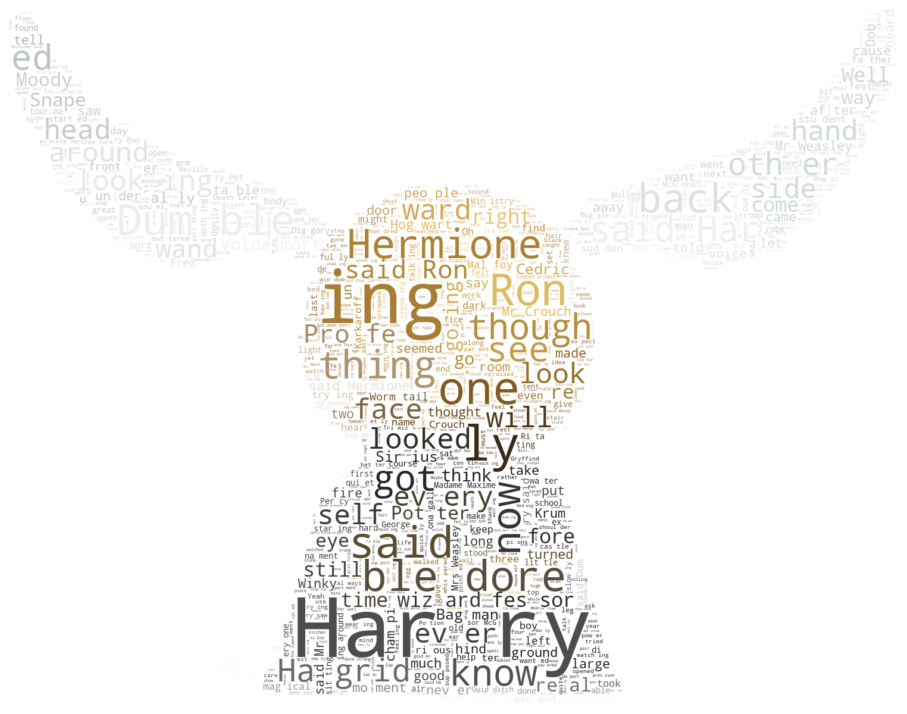

In [22]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image

#Create the mask
clouds_mask = np.array(Image.open("harrypotter2.png"))

clouds2_mask = np.array(Image.open("harrypotter2.png"))
color_mask = ImageColorGenerator(clouds2_mask)

wordcloud = WordCloud(background_color="white", mode="RGBA", max_words=1000, max_font_size=1000, mask=clouds_mask).generate(harrypotter_text)
# create coloring from image
plt.figure(figsize=[16,16])
plt.imshow(wordcloud.recolor(color_func=color_mask), interpolation="bilinear")
plt.axis("off")
plt.show()

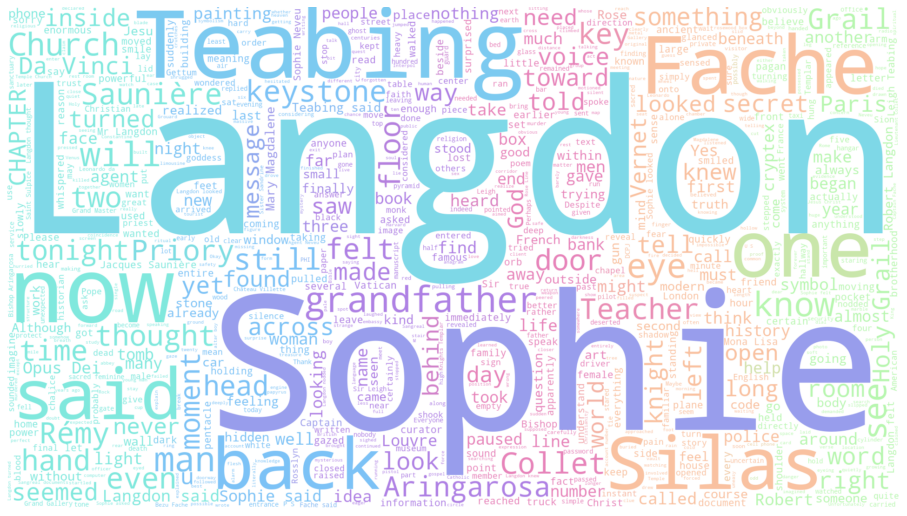

In [23]:
#Create the mask
clouds_mask = np.array(Image.open("cosmos2.png"))

clouds2_mask = np.array(Image.open("cosmos2.png"))
color_mask = ImageColorGenerator(clouds2_mask)

wordcloud = WordCloud(background_color="white", mode="RGBA", max_words=800, max_font_size=500, mask=clouds_mask).generate(davinci_text)
# create coloring from image
plt.figure(figsize=[16,16])
plt.imshow(wordcloud.recolor(color_func=color_mask), interpolation="bilinear")
plt.axis("off")
plt.show()

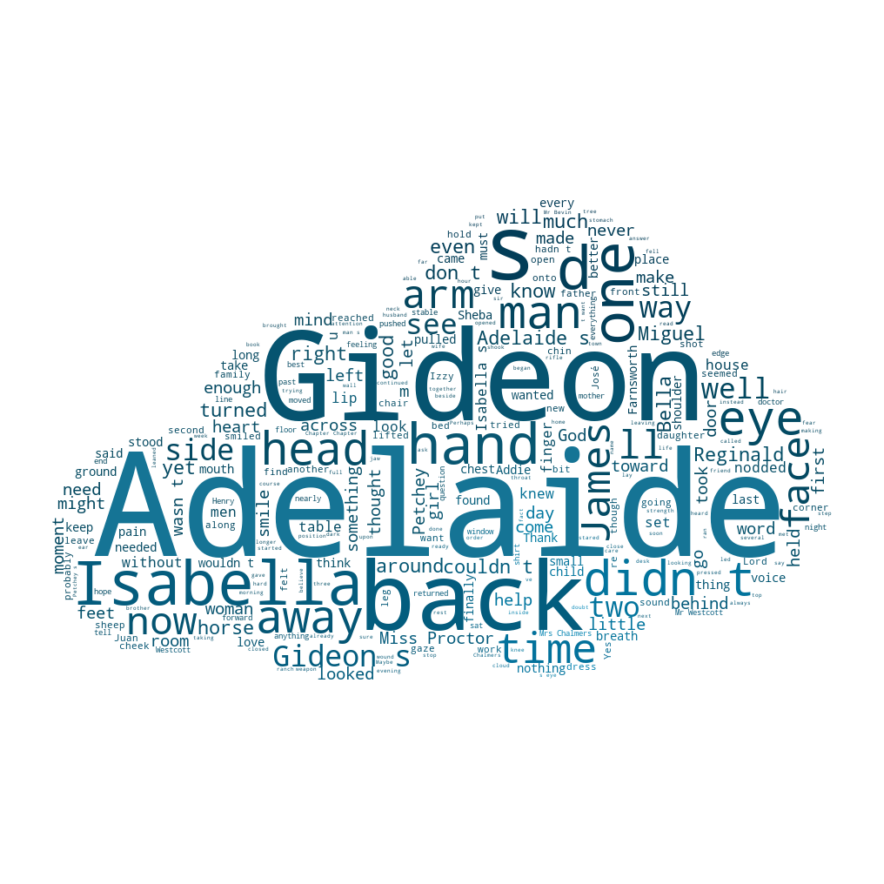

In [24]:
#Create the mask
clouds_mask = np.array(Image.open("clouds.png"))

clouds2_mask = np.array(Image.open("cloudss.png"))
color_mask = ImageColorGenerator(clouds2_mask)

wordcloud = WordCloud(background_color="white", mode="RGBA", max_words=300, max_font_size=500, mask=clouds_mask).generate(clouds_text)
# create coloring from image
plt.figure(figsize=[16,16])
plt.imshow(wordcloud.recolor(color_func=color_mask), interpolation="bilinear")
plt.axis("off")
plt.show()

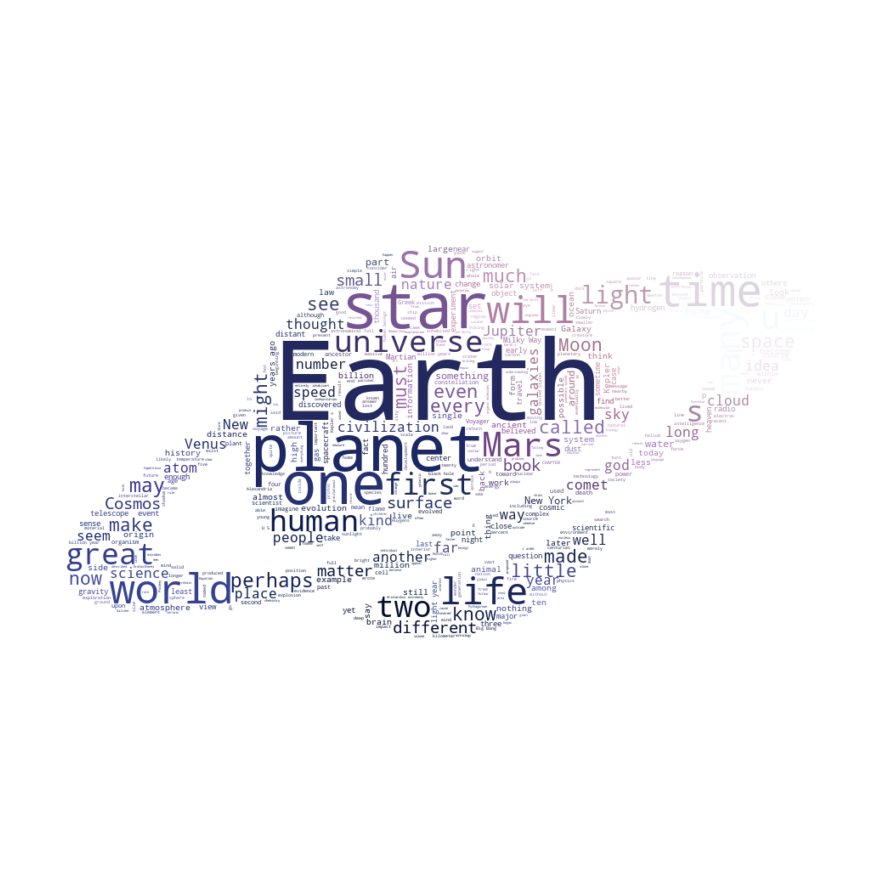

In [73]:
#Create the mask
cosmos_mask = np.array(Image.open("cosmos.png"))

cosmos2_mask = np.array(Image.open("cosmoss.png"))
color_mask = ImageColorGenerator(cosmos2_mask)

wordcloud = WordCloud(background_color="white", mode="RGBA", max_words=500, max_font_size=500, mask=cosmos_mask).generate(cosmos_text)
# create coloring from image
plt.figure(figsize=[16,16])
plt.imshow(wordcloud.recolor(color_func=color_mask), interpolation="bilinear")
plt.axis("off")
plt.show()

In [74]:
custom_stop_words = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]
harrypotter_words = count(harrypotter_df, _.word, sort=True)
harrypotter_words = filter(harrypotter_words,~_.word.isin(custom_stop_words))
harrypotter_words= filter(harrypotter_words,~_.word.isin(punctuation_signs))

harrypotter_words = harrypotter_words.reset_index()
harrypotter_words = harrypotter_words.drop(columns=['index'])


cosmos_words = count(cosmos_df, _.word, sort=True)
cosmos_words = filter(cosmos_words,~_.word.isin(custom_stop_words))
cosmos_words= filter(cosmos_words,~_.word.isin(punctuation_signs))

davinci_words = count(davinci_df, _.word, sort=True)
davinci_words = filter(davinci_words,~_.word.isin(custom_stop_words))
davinci_words= filter(davinci_words,~_.word.isin(punctuation_signs))


clouds_words = count(clouds_df, _.word, sort=True)
clouds_words = filter(clouds_words,~_.word.isin(custom_stop_words))
clouds_words= filter(clouds_words,~_.word.isin(punctuation_signs))


In [96]:
from siuba.dply.forcats import fct_lump, fct_reorder
from plotnine import *

head_count=count(filter(clouds_df, _.word.isin(['head'])),_.word)
clouds_count=count(filter(clouds_df, _.word.isin(['clouds'])),_.word)
clouds_count
clouds_words_count = pd.concat([head_count,clouds_count,clouds_words[:10]])
clouds_words_count = arrange(clouds_words_count, -_.n)
clouds_words_count = clouds_words_count.reset_index()
clouds_words_count = clouds_words_count.drop(columns=['index'])


cosmos_count=count(filter(cosmos_df, _.word.isin(['cosmos'])),_.word)
cosmos_count
cosmos_words_count = pd.concat([cosmos_count,cosmos_words[:10]])
cosmos_words_count = arrange(cosmos_words_count, -_.n)
cosmos_words_count = cosmos_words_count.reset_index()
cosmos_words_count = cosmos_words_count.drop(columns=['index'])


vinci_count=count(filter(davinci_df, _.word.isin(['vinci'])),_.word)
code_count=count(filter(davinci_df, _.word.isin(['code'])),_.word)
code_count
davinci_words_count = pd.concat([vinci_count,code_count,davinci_words[:10]])
davinci_words_count = arrange(davinci_words_count, -_.n)
davinci_words_count = davinci_words_count.reset_index()
davinci_words_count = davinci_words_count.drop(columns=['index'])

harry_count=count(filter(harrypotter_df, _.word.isin(['harry', 'har­ry'])))
potter_count=count(filter(harrypotter_df, _.word.isin(['potter'])),_.word)
potter_count
harrypotter_words = filter(harrypotter_words, ~_.word.isin(['harry', 'har­ry']))
                                               
harrypotter_words_count = pd.concat([harry_count,potter_count,harrypotter_words[:10]])
harrypotter_words_count = arrange(harrypotter_words_count, -_.n)
harrypotter_words_count = harrypotter_words_count.reset_index()
harrypotter_words_count = harrypotter_words_count.drop(columns=['index'])
harrypotter_words_count['word'] = harrypotter_words_count['word'].replace(np.nan, 'harry')

harrypotter_words_count

,n,word
0,2918,harry
1,974,ron
2,823,hermione
3,692,in­to
4,519,dum­ble­dore
5,483,looked
6,366,weasley
7,323,look­ing
8,321,ha­grid
9,315,eyes


,word,n
0,adelaide,790
1,gideon,789
2,isabella,375
3,man,226
4,eyes,208
...,...,...
8829,painfilled,1
8830,pained,1
8831,pails,1
8832,pail,1


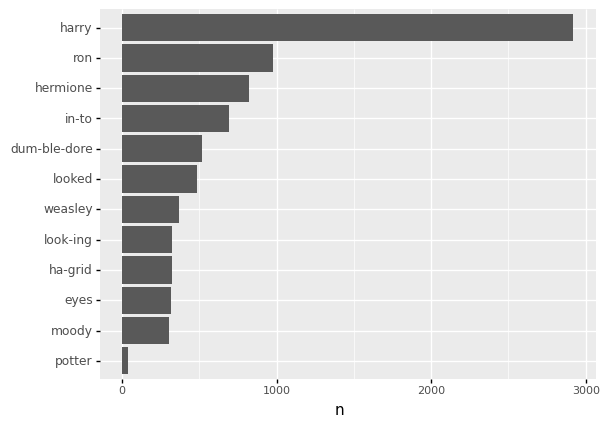

<ggplot: (93451523575)>

In [97]:
from siuba.dply.forcats import fct_lump, fct_reorder
ggplot(harrypotter_words_count) + aes(x=fct_reorder(harrypotter_words_count['word'], x=harrypotter_words_count['n']), y='n') + coord_flip() + geom_col(show_legend = False) + theme(subplots_adjust={'wspace': 0.35, 'hspace': 0.4})+theme(axis_text_x = element_text(size=8))

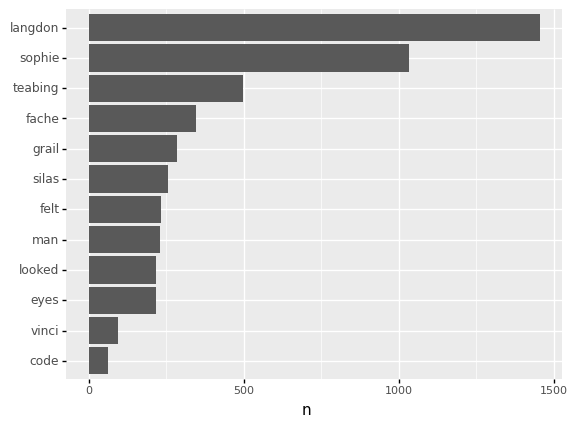

<ggplot: (93449643758)>

In [99]:
ggplot(davinci_words_count) + aes(x=fct_reorder(davinci_words_count['word'], x=davinci_words_count['n']), y='n') + coord_flip() + geom_col(show_legend = False) + theme(subplots_adjust={'wspace': 0.35, 'hspace': 0.4})+theme(axis_text_x = element_text(size=8))

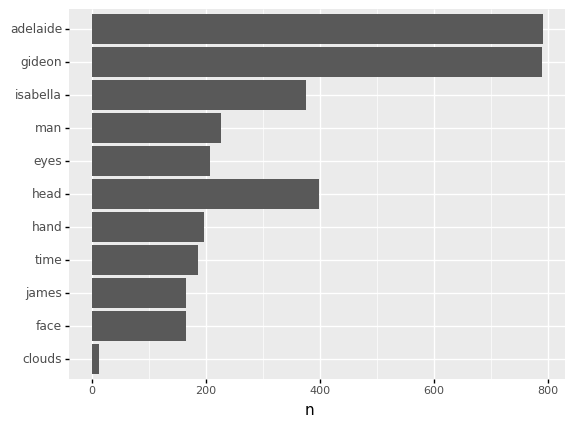

<ggplot: (93451114204)>

In [101]:
ggplot(clouds_words_count) + aes(x=fct_reorder(clouds_words_count['word'], x=clouds_words_count['n']), y='n') + coord_flip() + geom_col(show_legend = False) + theme(subplots_adjust={'wspace': 0.35, 'hspace': 0.4})+theme(axis_text_x = element_text(size=8))

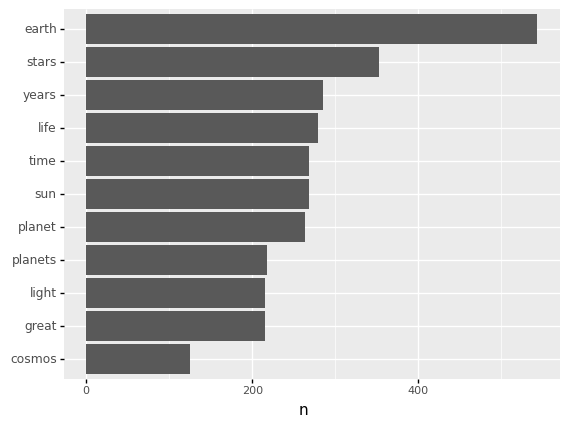

<ggplot: (93449642475)>

In [102]:
ggplot(cosmos_words_count) + aes(x=fct_reorder(cosmos_words_count['word'], x=cosmos_words_count['n']), y='n') + coord_flip() + geom_col(show_legend = False) + theme(subplots_adjust={'wspace': 0.35, 'hspace': 0.4})+theme(axis_text_x = element_text(size=8))